In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(clinical_data,mouse_data) 

# Display the data table for preview
pymaceuticals_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_average = pymaceuticals_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
drug_average = pd.DataFrame(drug_average).reset_index()
drug_average.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_sem = pymaceuticals_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to datafran
drug_sem = pd.DataFrame(drug_sem).reset_index()
drug_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_average = drug_average.reset_index()
drug_average_pivot = drug_average.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
drug_average_pivot.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Standard of errors
drug_sem = drug_sem.reset_index()
drug_sem_pivot = drug_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
drug_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


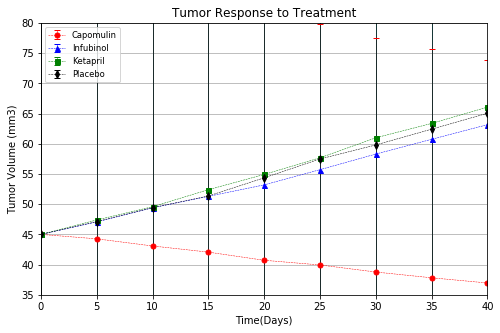

In [27]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(drug_average_pivot.index, drug_average_pivot["Capomulin"], yerr=drug_average_pivot["Capomulin"],marker="o", color="red", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_average_pivot.index, drug_average_pivot["Infubinol"], yerr=drug_average_pivot["Infubinol"],marker="^", color="blue", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_average_pivot.index, drug_average_pivot["Ketapril"], yerr=drug_average_pivot["Ketapril"],marker="s", color="green", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_average_pivot.index, drug_average_pivot["Placebo"], yerr=drug_average_pivot["Placebo"],marker="d", color="black", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)

plt.ylim(35,80)
plt.xlim(0,40)

#print graph properties
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best",fontsize='small', fancybox=True)
plt.savefig("Figure One")

plt.show()

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_met_average = pymaceuticals_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
drug_met_average = pd.DataFrame(drug_met_average).reset_index()

# Preview DataFrame
drug_met_average.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_met_sem = pymaceuticals_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']

# Convert to datafran
drug_met_sem = pd.DataFrame(drug_met_sem).reset_index()
drug_met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [23]:
# Minor Data Munging to Re-Format the Data Frames
#drug_met.average = drug_met_average.reset_index()
drug_met_average_pivot = drug_met_average.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
drug_met_average_pivot.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [24]:
# Minor Data Munging to Re-Format the Data Frames
# Standard of errors
#drug_sem = drug_sem.reset_index()
drug_met_sem_pivot = drug_met_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
drug_met_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


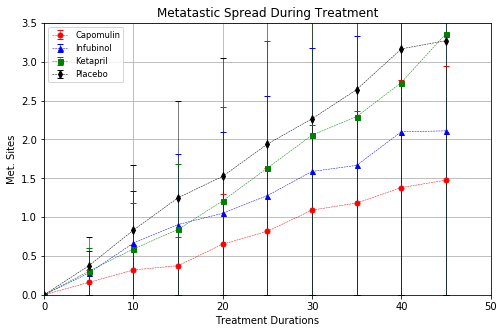

In [29]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(drug_met_average_pivot.index, drug_met_average_pivot["Capomulin"], yerr=drug_met_average_pivot["Capomulin"],marker="o", color="red", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_met_average_pivot.index, drug_met_average_pivot["Infubinol"], yerr=drug_met_average_pivot["Infubinol"],marker="^", color="blue", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_met_average_pivot.index, drug_met_average_pivot["Ketapril"], yerr=drug_met_average_pivot["Ketapril"],marker="s", color="green", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)
plt.errorbar(drug_met_average_pivot.index, drug_met_average_pivot["Placebo"], yerr=drug_met_average_pivot["Placebo"],marker="d", color="black", markersize= 5, linestyle="dashed", linewidth=.5, capsize=3)

plt.ylim(0,3.5)
plt.xlim(0,50)

#print graph properties
plt.title("Metatastic Spread During Treatment")
plt.xlabel("Treatment Durations")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend(loc="best",fontsize='small', fancybox=True)

# Save the Figure
plt.savefig("Figure Two")

# Show the Figure
plt.show()

## Survival Rates

In [54]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_mice_count = pymaceuticals_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
drug_mice_count.head()

# Convert to DataFrame
drug_mice_count = pd.DataFrame(drug_mice_count).reset_index()

# Preview DataFrame
drug_mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [56]:
# Minor Data Munging to Re-Format the Data Frames
drug_mice_pivot = drug_mice_count.pivot(index="Timepoint", columns="Drug")["Mouse ID"]

# Preview that Reformatting worked
drug_mice_pivot = pd.DataFrame(drug_mice_pivot).reset_index()

# Preview the Data Frame
drug_mice_pivot.head(100)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


0    100.0
1    100.0
2    100.0
3     96.0
4     92.0
5     88.0
6     88.0
7     88.0
8     84.0
9     84.0
Name: Capomulin, dtype: float64


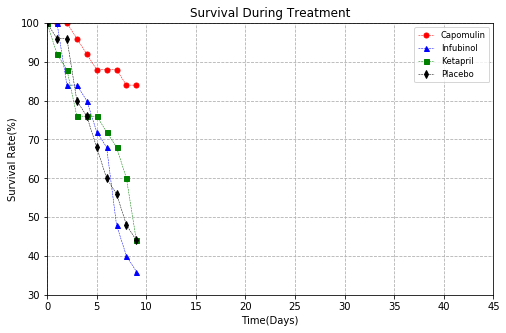

In [58]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(8,5))
capomulin_percent = (drug_mice_pivot["Capomulin"]/25)*100
print(capomulin_percent)
plt.plot(capomulin_percent, marker="o", color="red", markersize= 5, linestyle="dashed", linewidth=.5)
plt.plot(100*drug_mice_pivot["Infubinol"]/25, marker="^", color="blue", markersize= 5, linestyle="dashed", linewidth=.5)
plt.plot(100 *drug_mice_pivot["Ketapril"]/25, marker="s", color="green", markersize= 5, linestyle="dashed", linewidth=.5)
plt.plot(100 * drug_mice_pivot["Placebo"]/25, marker="d", color="black", markersize= 5, linestyle="dashed", linewidth=.5)

plt.ylim(30,100)
plt.xlim(0,45)

#print graph properties
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(linestyle="dashed")
plt.legend(loc="best",fontsize='small', fancybox=True)

# Save the Figure
plt.savefig("Figure Three")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined